<h1 style="font-family:courier new;"> SyriaTel Customer Churn Prediction </h1>

<font style="font-family:courier new;"> Sources</font>

<font size = '0'> <i> <b>Canvas - Flatiron School</b> </i>
https://learning.flatironschool.com/courses/6400

<i><b> Flatiron Github </b> </i>
https://github.com/flatiron-school/NTL01-DTSC-LIVE-040323/tree/main/3phase </font>

 _____________________________________________________________________________________________________________________________

<h2 style="font-family:courier new;"> OVERVIEW </h2>

To build a Machine Learning model for SyriaTel, a telecommunications company that predicts whether a customer will discontinue their subscriptions to the service provided. SyriaTel has compiled data about their customers who has retained and not retained their service, thus churning. Having a better understanding of the data, we can build visuals and see if there is any insights we can get before deciding how to build our Machine Learning model, and tune if necessary. 

<h2 style="font-family:courier new;"> Business Problem </h2>

Churning in the telecommunications industry is problematic for the provider as their customers offset their OPEX. The more churn the provider encounters, the company can be at a deficit considering their overhead expenditures to maintain operations. 

According to SyriaTel's data, its been noted that the provider is suffering from a 14.49% churn over rate. The high churn rate can be attributed for the following reasons listed below:
   - Tenure
   - Service plan a customer has
   - Calls made throughout the day and to customer service
   - Charges incurred throughout the day

Without any understanding or guidance into these issues, the provider can be at a loss, thus having to slow down business.

<h2 style="font-family:courier new;"> Business Objectives </h2>

The objective in conducting the analysis is to create a sophisticated Machine Learning algorithm that can predict customer churn, develop insighful strategies to prevent future customer turnover and possibly increase retention for SyriaTel.

____________________________________________________________________________________________________________

#### Imported Packages

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE # used for imbalace of data

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve,roc_auc_score

______________

#### Read DataFrame

In [424]:
df = pd.read_csv('Churn_In_Telecom.csv', low_memory=False)

# Replace column spaces with underscore
df.columns = df.columns.str.replace(' ','_')

___________

#### Functions

###### <font color = 'gray'> Evaluating the model (Confusion Matrix and metrics) </font>

In [262]:
def model_metrics_train(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    train_rec = recall_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_cm = confusion_matrix(y_train, y_train_pred)

    print("Training Data Results:")
    print("Accuracy:", train_acc)
    print("Precision:", train_prec)
    print("Recall:", train_rec)
    print("F1-score:", train_f1)
    print('_____________________')


In [378]:
def model_metrics_test(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    test_acc = accuracy_score(y_test, y_test_pred)
    test_rec = recall_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
                

    print("\nTest Data Results:")
    print("Accuracy:", test_acc)
    print("Precision:", test_prec)
    print("Recall:", test_rec)
    print("F1-score:", test_f1)
    print('_____________________')


In [379]:
def confusion_matrix_train(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_data = confusion_matrix(y_train, y_train_pred)         # Confusion Matrix for train data
    
    sns.heatmap(train_data, annot=True, fmt="d", cmap='Greens')  # Heatmap
    plt.title("Confusion Matrix - Training Data")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

In [380]:
def confusion_matrix_test(model, X_train, y_train, X_test, y_test):
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    test_data = confusion_matrix(y_test, y_test_pred)             # Confusion Matrix for test data

    sns.heatmap(test_data, annot=True, fmt="d", cmap="Greys")     # Heatmap
    plt.title("Confusion Matrix - Test Data")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

______________________

## Understanding the Data

<font color = 'gray'>Information regarding size and Datatypes</font>

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   float64
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   float64
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   float64
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   float64
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

<font color = 'gray'>Size of the DataFrame</font>

In [ ]:
df.shape

<font color = 'gray'>List the first 5 rows of the DataFrame</font>

We can see how the information is displayed in the DataFrame.

Improvements to be made at a glance:
- <b>Columns:</b> replace whitespacing with an underscore (referencing the columns are easier with this fix)
- <b>Drop Columns:</b> 'phone number' (not an essential component to the problem at hand; cant be analyzed)

In [282]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,0.676489,415,382-4657,no,yes,1.234883,265.1,0.476643,45.07,...,-0.055940,16.78,244.7,-0.465494,11.01,10.0,-0.601195,2.70,-0.427932,False
1,OH,0.149065,415,371-7191,no,yes,1.307948,161.6,1.124503,27.47,...,0.144867,16.62,254.4,0.147825,11.45,13.7,-0.601195,3.70,-0.427932,False
2,NJ,0.902529,415,358-1921,no,no,-0.591760,243.4,0.675985,41.38,...,0.496279,10.30,162.6,0.198935,7.32,12.2,0.211534,3.29,-1.188218,False
3,OH,-0.428590,408,375-9999,yes,no,-0.591760,299.4,-1.466936,50.90,...,-0.608159,5.26,196.9,-0.567714,8.86,6.6,1.024263,1.78,0.332354,False
4,OK,-0.654629,415,330-6626,yes,no,-0.591760,166.7,0.626149,28.34,...,1.098699,12.61,186.9,1.067803,8.41,10.1,-0.601195,2.73,1.092641,False


<font color = 'blue'>Fixing DataFrame</font>

<b>Removing whitespace in columns</b>

In [286]:
# Replace column spaces with underscore

# df.columns = df.columns.str.replace(' ','_')

#(HAS BEEN MOVED TO READ DATAFRAME SECTION)

<b>Removing unnecessary columns</b>

In [194]:
# Remove unnecessary columns
df = df.drop('phone_number', axis=1)

<b>View DataFrame after fix</b>

In [ ]:
# Updated DataFrame (renamed columns / dropped columns)
df.head(3)

_______________________________________

## Visualization

#### Bar Plot

In [175]:
false_churn_percentage, true_churn_percentage = df.churn.value_counts(True)

In [176]:
# False churn percentage
print('False churn percentage: ', false_churn_percentage * 100)
print('False churns: ', df.churn.value_counts().values[0])

print( ' ')

# True churn percentage
print('True churn percentage: ', true_churn_percentage * 100)
print('True churns: ', df.churn.value_counts().values[1])

# Churn rate
churn_rate = pd.DataFrame(df.churn.value_counts(True))

False churn percentage:  85.5085508550855
False churns:  2850
 
True churn percentage:  14.491449144914492
True churns:  483


In [139]:
churn_rate

,churn
False,0.855086
True,0.144914


<b>Account Length</b>
- A simple histogram plot to show the distribution of Account Length. It seems as if the average Account Length with SyriaTel is at around 120.

Account Length


<AxesSubplot:ylabel='Frequency'>

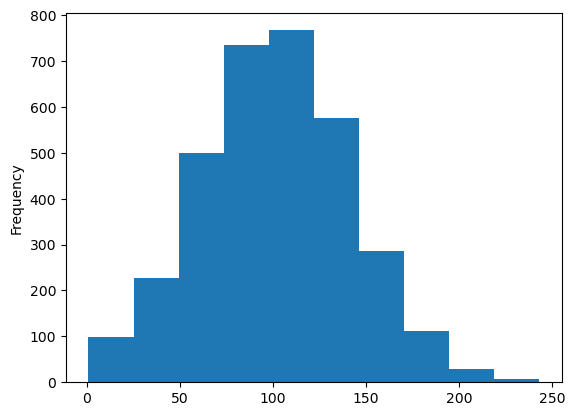

In [135]:
# Plot account_length
print('Account Length')
df.account_length.plot(kind='hist')

<b>Churn vs Retained Customers</b>
- This simple bar plot shows the retained customers and churned customers. The DataFrame contains 3333 rows. It shows 2850 retained customers, whereas 483 churned customers. 

Churn


<AxesSubplot:>

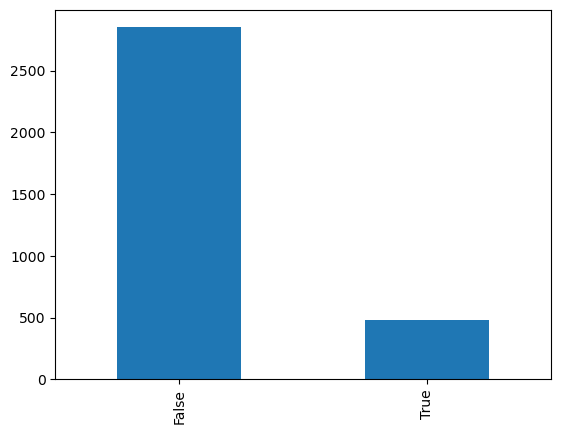

In [136]:
# Plot churn
print('Churn')
df.churn.value_counts().plot(kind='bar')

<b>Rate of Churn by Area Code</b>
- This is a bar plot showing the Rate of Churn by Area Code. We can see area code '415' is suffering from high churn in comparison with the rest of the area codes. This can be in result of having a lot of customers in '415', assuming the rate of churn is consistent across the other area codes.

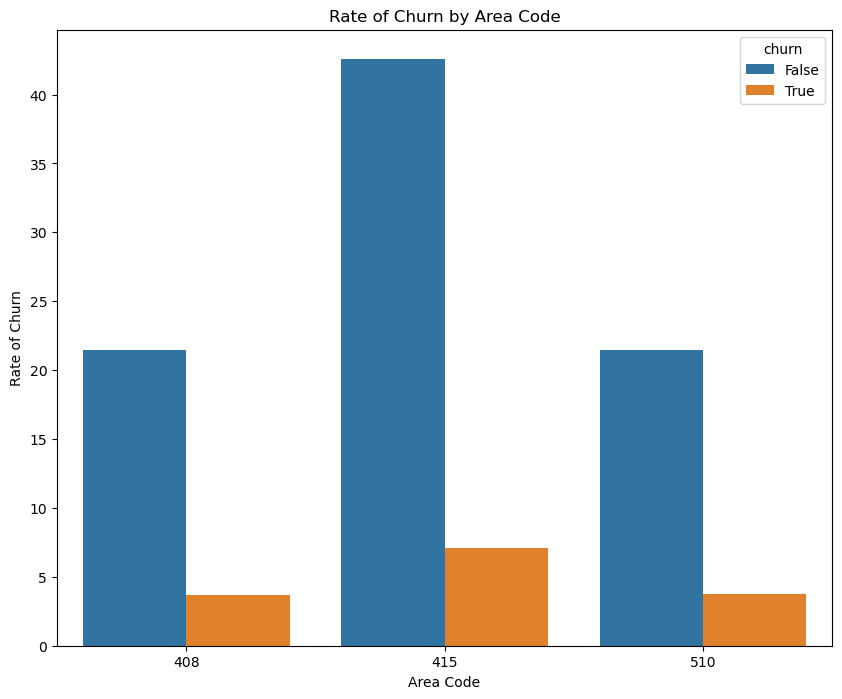

In [140]:
# Churn by area code

plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='area_code', y='churn', hue='churn', estimator=lambda c: len(c) / len(df) * 100)
plt.xlabel('Area Code')
plt.ylabel('Rate of Churn')
plt.title('Rate of Churn by Area Code')
plt.show()


<b> Rate of Churn - Retained customers vs Churned customers </b>
- This bar plot shows the rate of churn in the DataFrame. We can see the Churn rate is at about 15% whereas the Retained customers are at around 85%. 

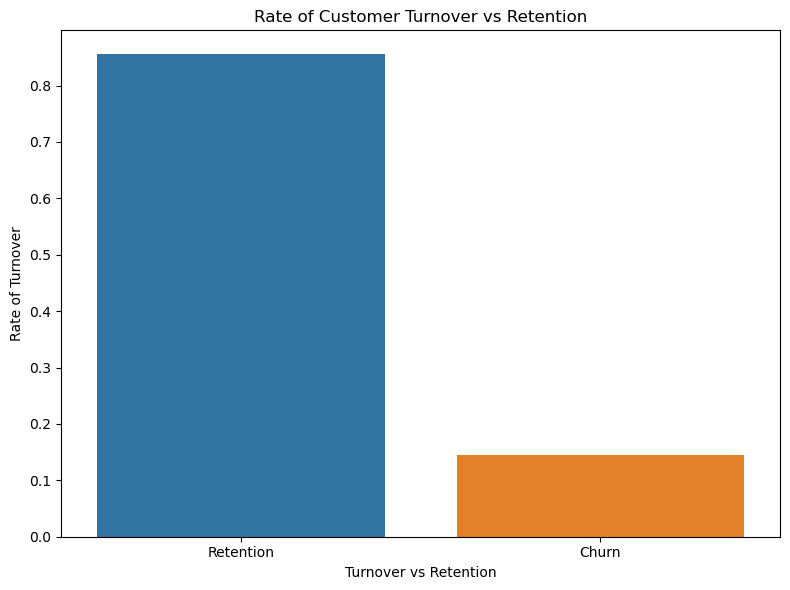

In [414]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x = [0, 1], y = 'churn', data = churn_rate, ax = ax)
plt.title('Rate of Customer Turnover vs Retention')
ax.tick_params(axis = 'both')
plt.xlabel('Turnover vs Retention')
plt.ylabel('Rate of Turnover')
ax.set_xticklabels(['Retention', 'Churn'])
plt.tight_layout()


<b>Count of Churn by State</b><br>
<br>
The bar plot shows the Count of Churn by State. The plot shows all of the states where the customers are located. 
- We can see the count of retained customers and churned. It shows churned counts descending in order. Its clear from the left side that the states are having the most churns, starting with Texas as it leads.
- The state with the most retained customers is West Virginia, topping around 95 customers.

In [ ]:
# The dataset seems imbalanced when analyzing the churn rates
# There seems to be more values in False than in True

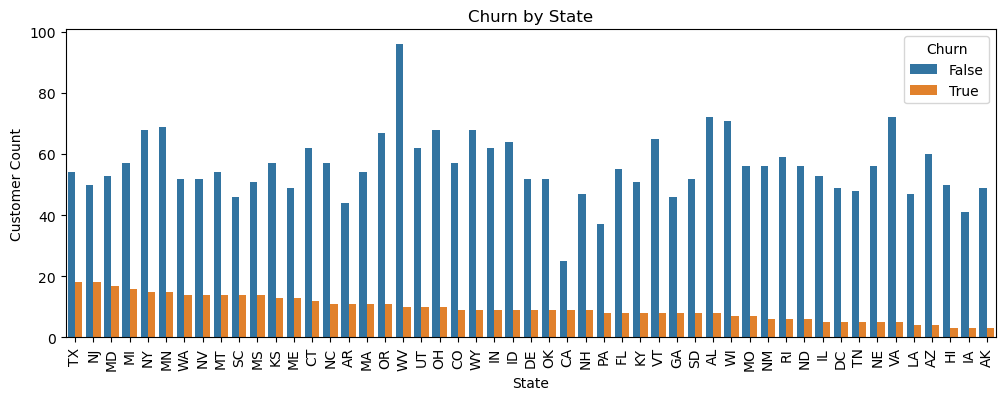

In [142]:
plt.figure(figsize=(12, 4))
states_churn = df[df['churn'] == True]['state'].value_counts().index
sns.countplot(data=df, x='state', hue='churn', order=states_churn)
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.title('Churn by State')
plt.xticks(rotation=90)
plt.legend(title='Churn', loc='upper right')
plt.show()

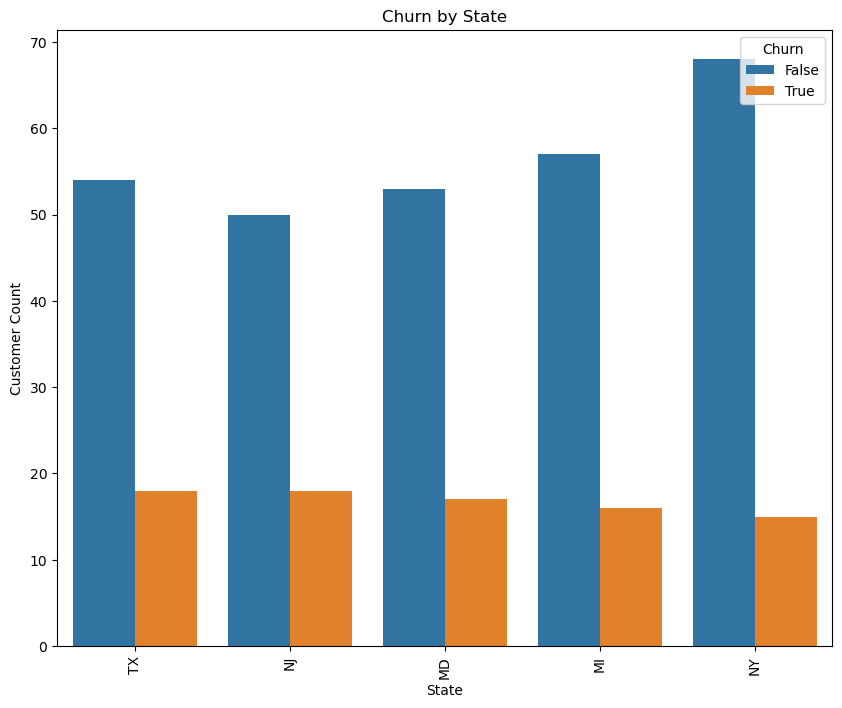

In [423]:
plt.figure(figsize=(10, 8))
states_churn = df[df['churn'] == True]['state'].value_counts().head().index
sns.countplot(data=df, x='state', hue='churn', order=states_churn)
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.title('Churn by State')
plt.xticks(rotation=90)
plt.legend(title='Churn', loc='upper right')
plt.show()

<b>Churn by Number of Customer Service Calls</b>

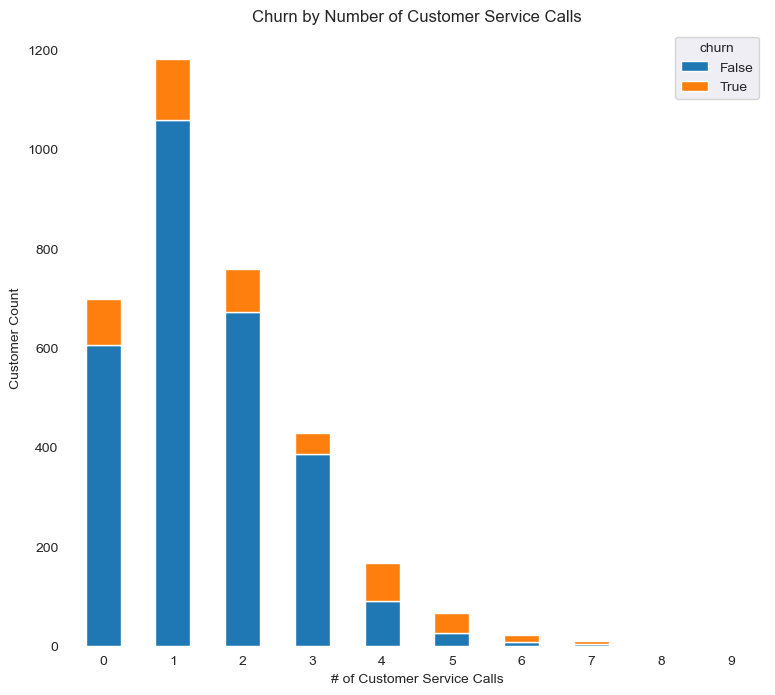

In [441]:
df_copy = df.copy()

p = df_copy.groupby(["customer_service_calls", "churn"]).size().unstack()


#sns.set_style("darkgrid")
sns.color_palette("rocket", as_cmap=True)
fig, ax = plt.subplots(figsize=(9,8))
p.plot(ax=ax, kind='bar', stacked=True)
ax.grid(False)
ax.set_facecolor('white')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_title("Churn by Number of Customer Service Calls")
ax.set_ylabel("Customer Count")
ax.set_xlabel("# of Customer Service Calls");
plt.xticks(rotation = 0);

In [292]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


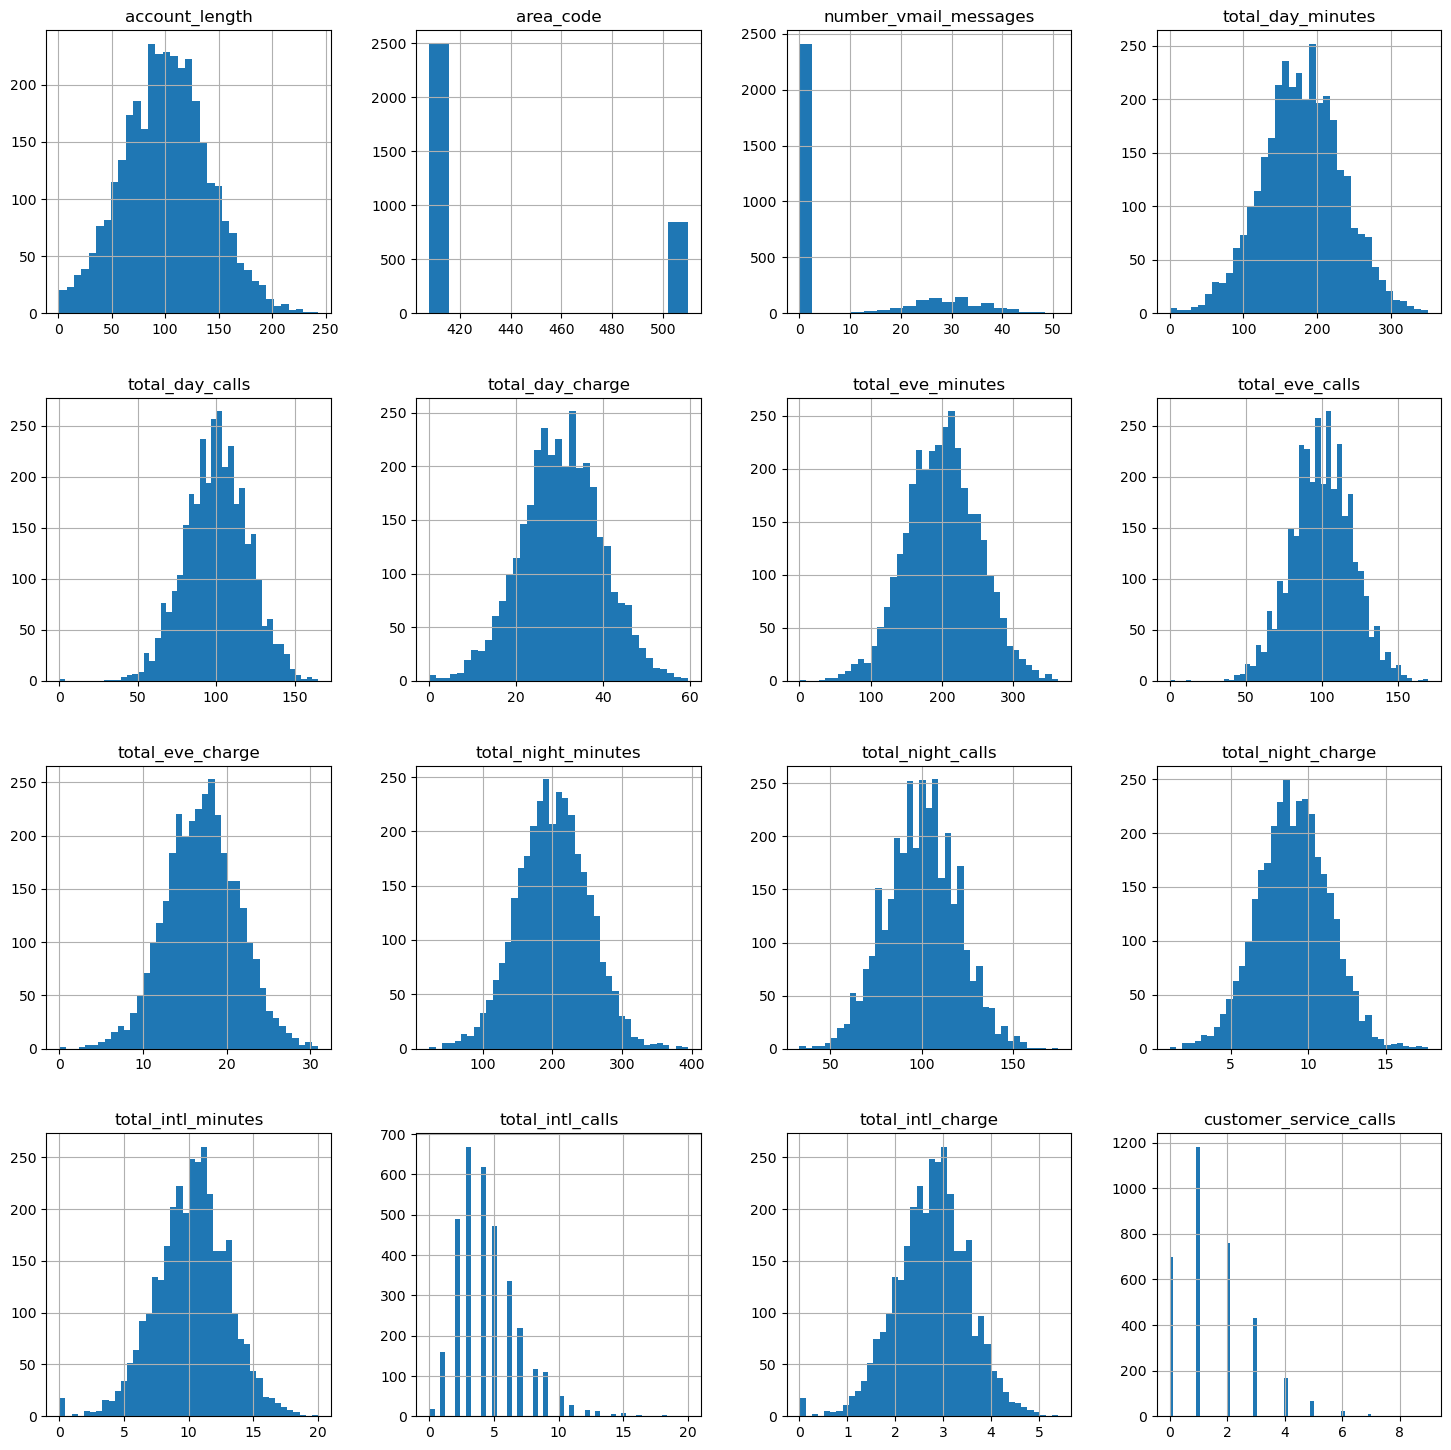

In [293]:
# Histogram excluding churn
df.drop('churn', axis=1).hist(figsize=(18,18), bins = 'auto');

<AxesSubplot:>

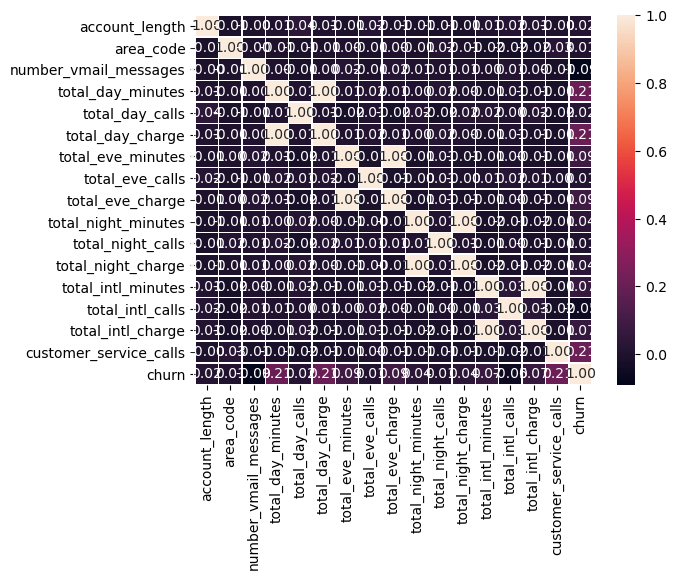

In [372]:
# Heatmap displaying correlation between columns
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.3)

___________

## <font color = 'red'> Data Modeling Preparation </font>

In [195]:
# Convert churn to binary
df['churn'] = df['churn'].map({True:1 ,False:0})
df['churn'] = df['churn'].astype(int)

#### <font color='purple'><b>[0]</b></font>   Categorical / Numerical 

                    ______________________Distinguish Categorical / Numerical______________________ 

- To help better organize the data and feed it directly into the model, we need to understand the Categorical and Numerical columns we want to further explore.

    - The categorical columns are those with various categories given a numerical value that can be interpreted by the algorithm, when One Hot Code is applied.

    - The numerical columns can be standardized to avoid any bias in the predictions due to different ranges in the training data  

In [239]:
# Categorical columns 
categorical = ['voice_mail_plan','state', 'area_code','international_plan']
categorical

['voice_mail_plan', 'state', 'area_code', 'international_plan']

In [238]:
# Numerical columns
numerical = df.select_dtypes(include='int64').drop('area_code', axis=1).columns
numerical

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_eve_calls', 'total_night_calls', 'total_intl_calls',
       'customer_service_calls'],
      dtype='object')

    ______________________________________________________________________________________________________________________

#### <font color='purple'><b>[1]</b></font>   One Hot Encoding

                                  __________________One Hot Encode__________________

- One-hot encoding is a technique used in machine learning to convert categorical data into a format that can be fed into machine learning algorithms to improve prediction accuracy.
    - In this case, we are feeding categorical variable that consist of columns 'state, 'international_plan', 'voice_mail_plan', and 'area_code'.

In [198]:
# One Hot Encode
df = pd.get_dummies(df, columns=categorical, drop_first=True)

df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_yes,voice_mail_plan_yes,area_code_415,area_code_510
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,1,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,1,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,1,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


#### <font color='purple'><b>[2]</b></font>  StandardScaler ()

                               ______________________StandardScaler()______________________

Applying StandardScaler() to the DataFrame, we can resize the distribution of values, to combat any differences in ranges and units of measure. This is an important step of data preparation before processing it to the algorithm.

In this case, we are passing the numerical variable through StandardScalers fit_transform() method so it can resize the numerical columns, which in this case are: <b>'account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'customer_service_calls'</b>

In [242]:
#Instantiate
scaler = StandardScaler()

# Fit and transform
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,0.676489,415,382-4657,no,yes,1.234883,265.1,0.476643,45.07,...,-0.055940,16.78,244.7,-0.465494,11.01,10.0,-0.601195,2.70,-0.427932,False
1,OH,0.149065,415,371-7191,no,yes,1.307948,161.6,1.124503,27.47,...,0.144867,16.62,254.4,0.147825,11.45,13.7,-0.601195,3.70,-0.427932,False
2,NJ,0.902529,415,358-1921,no,no,-0.591760,243.4,0.675985,41.38,...,0.496279,10.30,162.6,0.198935,7.32,12.2,0.211534,3.29,-1.188218,False
3,OH,-0.428590,408,375-9999,yes,no,-0.591760,299.4,-1.466936,50.90,...,-0.608159,5.26,196.9,-0.567714,8.86,6.6,1.024263,1.78,0.332354,False
4,OK,-0.654629,415,330-6626,yes,no,-0.591760,166.7,0.626149,28.34,...,1.098699,12.61,186.9,1.067803,8.41,10.1,-0.601195,2.73,1.092641,False


    ______________________________________________________________________________________________________________________

#### <font color='purple'><b>[3]</b></font>  Defining X and y variables

                                __________________Define X and y variables __________________

- To fit the data into a learning model, we need to convert the categories into dummy variables, which is denoted as binary in this case (0, 1). So to use the predictors (X-variable) in a model, for this case, a logistic regression, we must have dummy variables.  

In [200]:
# Defining X and y-variables
X = df.drop('churn', axis = 1)
y = df['churn']

In [201]:
# Converting categorical values using get_dummies
#X = pd.get_dummies(X)
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_yes,voice_mail_plan_yes,area_code_415,area_code_510
0,0.676489,1.234883,265.1,0.476643,45.07,197.4,-0.055940,16.78,244.7,-0.465494,...,0,0,0,0,0,0,0,1,1,0
1,0.149065,1.307948,161.6,1.124503,27.47,195.5,0.144867,16.62,254.4,0.147825,...,0,0,0,0,0,0,0,1,1,0
2,0.902529,-0.591760,243.4,0.675985,41.38,121.2,0.496279,10.30,162.6,0.198935,...,0,0,0,0,0,0,0,0,1,0
3,-0.428590,-0.591760,299.4,-1.466936,50.90,61.9,-0.608159,5.26,196.9,-0.567714,...,0,0,0,0,0,0,1,0,0,0
4,-0.654629,-0.591760,166.7,0.626149,28.34,148.3,1.098699,12.61,186.9,1.067803,...,0,0,0,0,0,0,1,0,1,0


    ______________________________________________________________________________________________________________________

#### <font color='purple'><b>[4]</b></font> Train, Test, Split

                               _____________________Train-Test Split_____________________

- Making use of the Train-Test Split is vital as its used to estimate the performance of the learning model for predictions, when comparing the algorithms for the predictive model at hand.

In [202]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [203]:
X_train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_yes,voice_mail_plan_yes,area_code_415,area_code_510
367,-1.408093,-0.591760,78.2,1.323844,13.29,253.4,0.395875,21.54,255.0,-0.005505,...,0,0,0,0,0,0,0,0,1,0
3103,0.349989,-0.591760,195.9,0.526479,33.30,227.0,0.395875,19.30,313.2,0.658924,...,0,0,0,0,0,0,0,0,1,0
549,0.500681,1.673277,237.1,-1.865619,40.31,205.6,0.847691,17.48,196.7,-0.772154,...,0,0,0,0,0,0,0,1,0,0
2531,1.982493,-0.591760,143.3,1.672692,24.36,180.5,0.646884,15.34,184.2,-0.669934,...,0,0,0,0,0,0,0,0,1,0
2378,0.274642,-0.591760,206.2,1.074667,35.05,164.5,-0.306949,13.98,140.3,0.045605,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.123950,-0.591760,274.4,0.974997,46.65,198.6,-0.909370,16.88,160.8,-1.947682,...,0,0,0,0,0,0,0,0,0,1
1130,0.525797,-0.591760,35.1,-1.915454,5.97,180.8,-0.557958,15.37,251.6,-2.152122,...,0,0,0,0,0,0,0,0,1,0
1294,-0.880668,-0.591760,87.6,-1.217759,14.89,262.0,0.546480,22.27,184.6,1.272243,...,0,0,0,0,0,0,0,0,0,0
860,1.706223,-0.591760,179.2,0.526479,30.46,175.2,1.500313,14.89,228.6,-0.414384,...,0,0,0,0,0,0,0,0,1,0


    ______________________________________________________________________________________________________________________

#### <font color='purple'><b>[5]</b></font>  Resampling Data points (SMOTE)

                   ____________________________RESAMPLING - USING SMOTE____________________________

                                                        SMOTE

- We use the SMOTE, which stands for Synthetic Minority Oversampling Technique. This is a algorithm design to oversample the minority class. Since there is an imbalance in class 1 (True), we will need to apply SMOTE to generate synthetic data points that is based off the original data points.

- After applying SMOTE, the Synthetic sample class distribution is now 50/50, meaning the distribution of data points are now balanced.


In [204]:
# Instantiate 
sm = SMOTE(random_state=42)
# Fit 
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


    ______________________________________________________________________________________________________________________

######  <font color = 'gray'> Before and After comparison of shape and class distribution

<font color= 'red'><b> Before Resampling </b></font>

In [205]:
# Class distribution
print('Class distribution: ')
print(y_train.value_counts())
print(' ')


# Shape
print('X-train: ', X_train.shape)
print('y-train: ', y_train.shape)

Class distribution: 
0    2141
1     358
Name: churn, dtype: int64
 
X-train:  (2499, 69)
y-train:  (2499,)


<font color= 'green'><b> After Resampling (SMOTE)</b> </font>

In [127]:
# Class distribution
print('Class distribution: ')
print(y_train_resampled.value_counts())
print(' ')

# Shape
print('Shape:')
print('X-train: ', X_train_resampled.shape)
print('y-train: ', y_train_resampled.shape)

Class distribution: 
1    2141
0    2141
Name: churn, dtype: int64
 
Shape:
X-train:  (4282, 69)
y-train:  (4282,)


    ______________________________________________________________________________________________________________________

#### <font color='green'><b>[6]</b></font>  Logistic Regression using Resampled Data points

                              ________________________Logistic Regression________________________

- This classification model is used to predict a binary outcome based on prior data observations, well suited for predicting customer churn (0, 1). Using churn as the dependent variables, y, we are able to see the relationships with the independent variables in X.

In [402]:
# Instantiate the model
logreg_stock = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model
logreg_stock.fit(X_train_resampled, y_train_resampled)

# Predict the test
y_test_pred = logreg_stock.predict(X_test)

# Predict the train
y_train_pred = logreg_stock.predict(X_train_resampled)

print('Training Data:\n', classification_report(y_train_resampled, logreg_stock.predict(X_train_scaled)))
print('Testing Data:\n', classification_report(y_test, logreg_stock.predict(X_test_scaled)))

Training Data:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      2141
           1       0.98      0.82      0.89      2141

    accuracy                           0.90      4282
   macro avg       0.91      0.90      0.90      4282
weighted avg       0.91      0.90      0.90      4282

Testing Data:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       709
           1       0.07      0.01      0.01       125

    accuracy                           0.83       834
   macro avg       0.46      0.49      0.46       834
weighted avg       0.73      0.83      0.78       834



    ______________________________________________________________________________________________________________________

### Model Evaluation

                                                 Model Evaluation

## <font color = 'green'> Logistic Regression (Stock) </font>

- To get a better indication of the performance of the Logistic Regression Model, we will define a function called model_evaluation, that will calculate:
        - Accuracy
        - Recall
        - Precision
        - F1-Score
  
  Then, it will plot a Confusion Matrix for the trained and test data, and result with a summary at the bottom of each matrix, showing us the values of the respective metrics listed above.

In [403]:
model_metrics_train(logreg_stock, X_train_resampled, y_train_resampled, X_test, y_test)
model_metrics_test(logreg_stock, X_train_resampled, y_train_resampled, X_test, y_test)

Training Data Results:
Accuracy: 0.9091546006539001
Precision: 0.9332344213649851
Recall: 0.8813638486688463
F1-score: 0.9065577708383378
_____________________

Test Data Results:
Accuracy: 0.8525179856115108
Precision: 0.5113636363636364
Recall: 0.36
F1-score: 0.4225352112676056
_____________________


    ______________________________________________________________________________________________________________________

### <font color = 'red'>●</font> </font> <font color = 'green'>●</font></font> <font color = 'blue'>●</font> <font color = 'orange'> Logistic Regression Model Tune-up </font> 

At this stage, the Logisitc Regression model will be tuned via hyperparameters, which in result can reach higher performance.

To tune the hyperparameters:
   - The Pipeline needs to be defined with the max iterations and tolerance.
   - Define the hyperparameter grid used for tuning
   - Fit the grid search cross validation
   - Plug in the best parameters and score
   - Retrieve teh best model

                           _________________Hyperparameter Tuning_________________

This code is used to perform hyperparameter tuning on a logistic regression model using GridSearchCV. It first line creates a pipeline that contains a logistic regression model with the specified maximum number of iterations and tolerance. Then, itcreates a dictionary of hyperparameters to tune. The ‘logreg__’ prefix is used to specify that the hyperparameters are for the logistic regression model in the pipeline.

Then, a GridSearchCV object is created with the pipeline, hyperparameters, 5-fold cross-validation, and accuracy as the scoring metric. Its then fitted with the GridSearchCV object to the training data.

The code displays the best hyperparameters and best score from the GridSearchCV object.

Finally, the best estimator is extracted from the GridSearchCV object.

In [408]:
max_iterations = 1000          # max_iter for LogisticRegression parameters
tolerance = .001               # tol for LogisticRegression parameters
############################################
hp_grid = {
    'logreg__C': [0.1, 1, 10],
    'logreg__solver': ['liblinear', 'saga'],  
    'logreg__penalty': ['l1', 'l2'],  
    'logreg__multi_class': ['auto', 'ovr']
}

##########################################################################################

pl_lr = Pipeline([('logreg', LogisticRegression(max_iter=max_iterations, tol=tolerance))])
gs_lr = GridSearchCV(pl_lr, param_grid=hp_grid, scoring='accuracy', cv=5)
gs_lr.fit(X_train_resampled, y_train_resampled)

best_params = gs_logreg.best_params_
best_score = gs_logreg.best_score_


print("Best Parameters:", best_params)
print("Best Score:", best_score)

logreg_tuned = gs_lr.best_estimator_

Best Parameters: {'logreg__C': 10, 'logreg__multi_class': 'auto', 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best Score: 0.8867842070251584


                                      _______________Feature Importance_______________

This code is used to plot the top 10 features of the best logistic regression model. The codeextracts the coefficients of the best logistic regression model. Then, it normalizes the feature importance values to a scale of 0-100 and select the top 10 features.

The names of the features are retrieved and a function is called that plots the top 10 features.

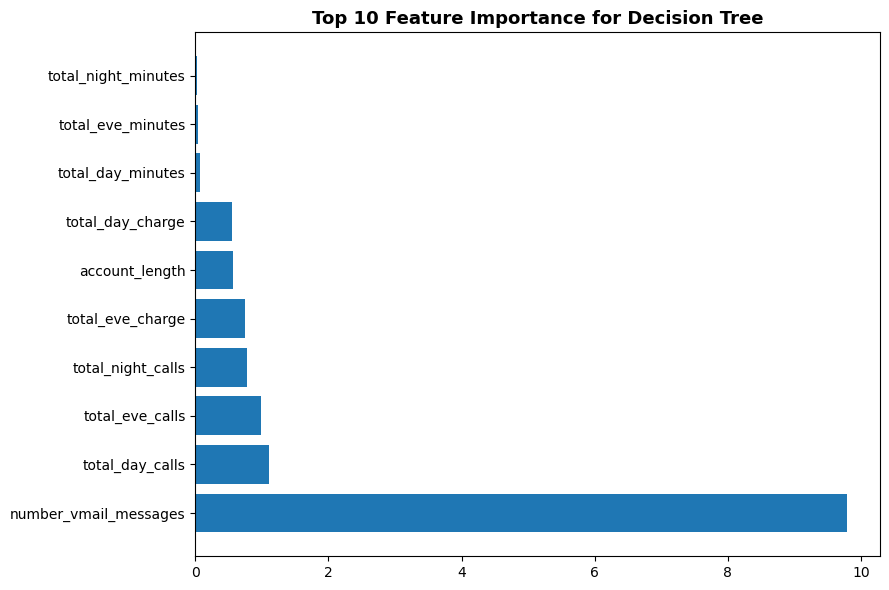

In [409]:
feat_i_lr_tuned = abs(logreg_tuned.named_steps['logreg'].coef_[0])

feat_i_lr_tuned = 100.0 * (feat_i_lr_tuned / feat_i_lr_tuned.max())

feat_i_lr_tuned = feat_i_lr_tuned[:10]
feat_names = X.columns.tolist()
top_feature_names = feature_names[:top_n]


sort_index = np.argsort(feat_i_lr_tuned)[::-1][:10]
position = np.arange(sort_index.shape[0]) + 0.5

fig, ax = plt.subplots(figsize=(9, 6))

ax.barh(position, feat_i_lr_tuned[sort_index], align='center')
ax.set_title("Top 10 Feature Importance for Decision Tree", fontsize=13, fontweight='bold')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(feat_names)[sort_index], fontsize=10)

plt.tight_layout()
plt.show()

Training Data Results:
Accuracy: 0.9091546006539001
Precision: 0.9332344213649851
Recall: 0.8813638486688463
F1-score: 0.9065577708383378
_____________________

Test Data Results:
Accuracy: 0.8525179856115108
Precision: 0.5113636363636364
Recall: 0.36
F1-score: 0.4225352112676056
_____________________


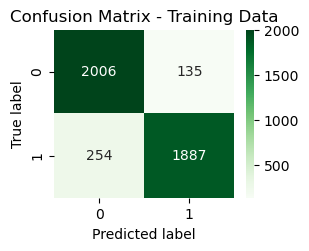

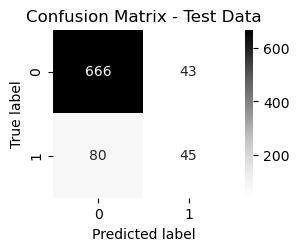

In [406]:
model_metrics_train(best_model, X_train_resampled, y_train_resampled, X_test, y_test)
model_metrics_test(best_model, X_train_resampled, y_train_resampled, X_test, y_test)


plt.subplot(2, 2, 1)
confusion_matrix_train(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

plt.subplot(2, 2, 2)
confusion_matrix_test(best_model, X_train_resampled, y_train_resampled, X_test, y_test)


                                            ____________Evaluation ____________

<b> Model Evaluation </b>

<i><u>Results:</u></i>

<b> <font color = 'green'> Stock </font></b>
    
<u>Training Data Results:</u> <br>
<b>Accuracy:</b> 0.9091546006539001 <br>
<b>Precision:</b> 0.9332344213649851 <br>
<b>Recall:</b> 0.8813638486688463 <br>
<b>F1-score:</b> 0.9065577708383378 <br>

<u>Test Data Results:</u> <br>
<b>Accuracy:</b> 0.8525179856115108 <br>
<b>Precision:</b> 0.5113636363636364 <br>
<b>Recall:</b> 0.36 <br>
<b>F1-score:</b> 0.4225352112676056 <br>
 <br>
  <br>


<font color = 'red'>●</font> </font> <font color = 'green'>●</font></font> <font color = 'blue'>●</font> <font color = 'orange'><b>Tune-up</b> </font>

<u>Training Data Results:</u> <br>
<b>Accuracy:</b> 0.9105558150397011 <br>
<b>Precision:</b> 0.9452887537993921 <br>
<b>Recall:</b> 0.8715553479682392 <br>
<b>F1-score:</b> 0.9069258809234508 <br>


<u>Test Data Results:</u> <br>
<b>Accuracy:</b> 0.8441247002398081 <br>
<b>Precision:</b> 0.4657534246575342 <br>
<b>Recall:</b> 0.272 <br>
<b>F1-score:</b> 0.3434343434343434 <br>


The Logistic Model <font color = 'red'>●</font> </font> <font color = 'green'>●</font></font> <font color = 'blue'>●</font> <font color = 'orange'><b>Tune-up</b> </font> has improved over the <b> <font color = 'green'> Stock </font></b>, by increasing in Accuracy and Precision, and a decrease in Recall. What this suggest is that there are fewer false positives relative to true positives, and when the model predicts a positive outcome, it is more likely to be correct.

As for the decrease in Recall in the <font color = 'red'>●</font> </font> <font color = 'green'>●</font></font> <font color = 'blue'>●</font> <font color = 'orange'><b>Tune-up</b> </font> model, we can say there might be a slight overfitting in the model that causes the test to perform poorly. 

______________________________________________________________________________________________________________________

## <font color = '#118603 '>Decision Trees 𓆱𓍊𓋼𓍊𓋼𓍊</font> 

For the second model used, we will go with Decision Trees. It is a good algorithm that can demonstrate various outcomes. It is great for decision making at it shows all possible outcomes to a problem. We can use this to predict various outcomes in the future for churn.

- The below we can fit a Decision Tree classifier on the resampled training set, then predict on the test set.
- We implement Feature Importance on a Decision Tree Classifier and plotted the top 10 features with their importance value.

In [398]:
steps = [('dt', DecisionTreeClassifier(random_state=123))]
dt_stock = Pipeline(steps)
dt_stock.fit(X_train_resampled, y_train_resampled)
y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train_resampled)

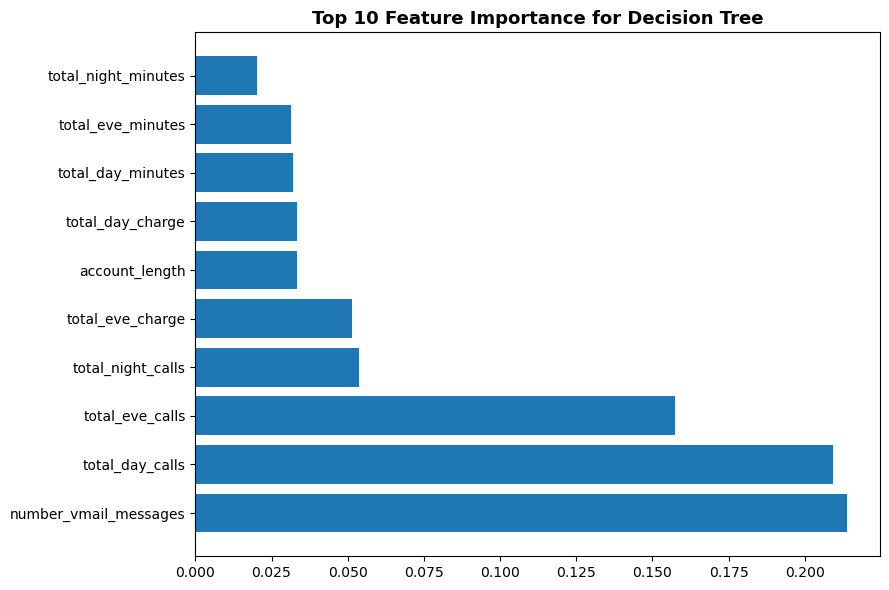

In [399]:
tree_model = dt_stock.named_steps['dt']
feature_importance = tree_model.feature_importances_
feature_names = X.columns.tolist()

sort_index2 = np.argsort(feat_importance)[::-1][:10]
position = np.arange(sort_index2.shape[0]) + 0.5

fig, ax = plt.subplots(figsize=(9, 6))

ax.barh(position, feat_importance[sort_index2], align='center')
ax.set_title("Top 10 Feature Importance for Decision Tree", fontsize=13, fontweight='bold')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(feat_names)[sort_index], fontsize=10)

plt.tight_layout()
plt.show()

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

When comparing the performance between the training and the test data, we can agree the training data is performing exceptionally well, but its too good to be true, hence overfitting is a possibility. As for the test data, it indicates an accuracy of 85.49%. Recall/Precision/F1-Score is not bad nor good, but there is still room for more improvement. <br>

<b>Comparing Logistic Regression (Stock)</b><br>
In terms of comparison, its evident Decision Tree test data is performing well in all metric categories.


In [367]:
model_metrics_train(pipeline, X_train_resampled, y_train_resampled, X_test, y_test)
model_metrics_test(pipeline, X_train_resampled, y_train_resampled, X_test, y_test)

Training Data Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
_____________________

Test Data Results:
Accuracy: 0.854916067146283
Precision: 0.5123456790123457
Recall: 0.664
F1-score: 0.578397212543554
_____________________


______________________________________________________________________________________________________________________

### <font color = 'FFE2FB'>■</font> </font> <font color = '#FF3BE4'>■</font></font> <font color = '#03CDFF'>■</font> <font color = 'orange'> Decision Model Tune-up </font> 

At this stage, the Decision Tree model will be tuned via hyperparameters, which in result can reach higher performance.

To tune the hyperparameters:
- The Pipeline needs to be defined with the max iterations and tolerance.
- Define the hyperparameter grid used for tuning
- Fit the grid search cross validation
- Plug in the best parameters and score
- Retrieve the best model

In [400]:
param_grid = {
    'dt__max_depth': [None, 5, 10],
    'dt__min_samples_split': [2, 5, 10],  
    'dt__min_samples_leaf': [1, 2, 4] , 
    'dt__criterion': ['gini', 'entropy'], 
    'dt__max_features': ['sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=123)

pipe_dt = Pipeline([('dt', dt)])
dt_grid_search = GridSearchCV(pipe_dt, param_grid=param_grid, scoring='accuracy', cv=5)
dt_grid_search.fit(X_train_resampled, y_train_resampled)
dt_tuned = dt_grid_search.best_estimator_

y_test_pred = dt_tuned.predict(X_test)
y_train_pred = dt_tuned.predict(X_train_resampled)


print("Best Hyperparameters: ", dt_grid_search.best_params_)
print("Best Score: ", dt_grid_search.best_score_)

Best Hyperparameters:  {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__max_features': 'sqrt', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}
Best Score:  0.8549883313885648


Training Data Results:
Accuracy: 0.9848201774871556
Precision: 0.9905482041587902
Recall: 0.9789817842129845
F1-score: 0.9847310312426591
_____________________

Test Data Results:
Accuracy: 0.815347721822542
Precision: 0.4152046783625731
Recall: 0.568
F1-score: 0.4797297297297297
_____________________


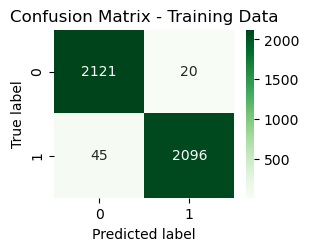

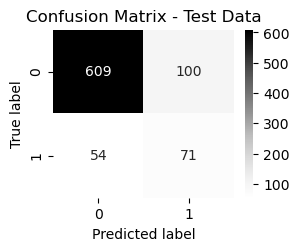

In [401]:
model_metrics_train(dt_tuned, X_train_resampled, y_train_resampled, X_test, y_test)
model_metrics_test(dt_tuned, X_train_resampled, y_train_resampled, X_test, y_test)

plt.subplot(2, 2, 1)
confusion_matrix_train(dt_tuned, X_train_resampled, y_train_resampled, X_test, y_test)

plt.subplot(2, 2, 2)
confusion_matrix_test(dt_tuned, X_train_resampled, y_train_resampled, X_test, y_test)

<b> Decision Tree Model Evaluation </b>

<i><u>Results:</u></i>

<b> <font color = 'green'> Stock </font></b>
    
<u>Training Data Results:</u> <br>
<b>Accuracy:</b> 1.0 <br>
<b>Precision:</b> 1.0 <br>
<b>Recall:</b> 1.0 <br>
<b>F1-score:</b> 1.0 <br>

<u>Test Data Results:</u> <br>
<b>Accuracy:</b> 0.854916067146283 <br>
<b>Precision:</b> 0.5123456790123457 <br>
<b>Recall:</b> 0.664 <br>
<b>F1-score:</b> 0.578397212543554 <br>
 <br>
  <br>

<font color = 'FFE2FB'>■</font> </font> <font color = '#FF3BE4'>■</font></font> <font color = '#03CDFF'>■</font> <font color = 'orange'><b>Tune-up</b> </font>

<u>Training Data Results:</u> <br>
<b>Accuracy:</b> 0.9848201774871556 <br>
<b>Precision:</b> 0.9905482041587902 <br>
<b>Recall:</b> 0.9789817842129845 <br>
<b>F1-score:</b> 0.9847310312426591 <br>


<u>Test Data Results:</u> <br>
<b>Accuracy:</b> 0.815347721822542 <br>
<b>Precision:</b> 0.4152046783625731 <br>
<b>Recall:</b> 0.568 <br>
<b>F1-score:</b> 0.4797297297297297 <br>


The Logistic Model <font color = 'FFE2FB'>■</font> </font> <font color = '#FF3BE4'>■</font></font> <font color = '#03CDFF'>■</font> <font color = 'orange'><b>Tune-up</b> </font> has improved over the <b> <font color = 'green'> Stock </font></b>, by increasing in Accuracy and Precision, and a decrease in Recall. What this suggest is that there are fewer false positives relative to true positives, and when the model predicts a positive outcome, it is more likely to be correct.

As for the decrease in Recall in the <font color = 'FFE2FB'>■</font> </font> <font color = '#FF3BE4'>■</font></font> <font color = '#03CDFF'>■</font> <font color = 'orange'><b>Tune-up</b> </font> model, we can say there might be a slight overfitting in the model that causes the test to perform poorly. 

When comparing the performance between the training and the test data, we can agree the training data is performing exceptionally well, but its too good to be true, hence overfitting is a possibility. As for the test data, it indicates an accuracy of 85.49%. Recall/Precision/F1-Score is not bad nor good, but there is still room for more improvement. <br>

## Model Comparison (ROC Curve)

Logistic Regression ROC AUC: 0.8273
Logistic Regression (Tune-up) ROC AUC: 0.8171
Decision Tree ROC AUC: 0.7763
Decision Tree (Tune-up) ROC AUC: 0.7167


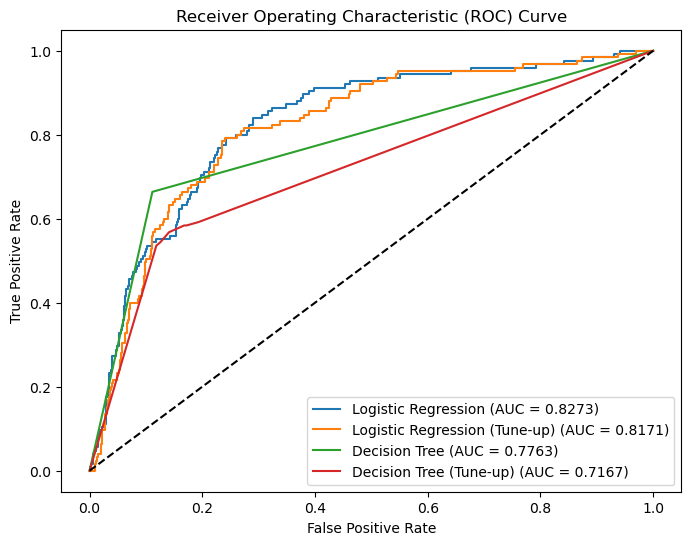

In [410]:
# models
models = [logreg_stock, logreg_tuned, dt_stock, dt_tuned]
model_names = ['Logistic Regression', 'Logistic Regression (Tune-up)', 'Decision Tree', 'Decision Tree (Tune-up)']
# plot
plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    # Fit the model on training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for positive class
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_proba)
    # Print ROC AUC score
    print(f'{name} ROC AUC: {auc_score:.4f}')

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

# Plot diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend(loc='lower right')

# Show the plot
plt.show()